<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-make-it-aesthetic/blob/master/MakeItAesthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make it Aesthetic

# Table of Content
 1 Introduction
 
 2 Goals and Use Cases
  
 2.1 Our Goals

 2.2 Use Cases

 3 Theory and Methods
 
 4 Process
 
 5 Literature

# 1 Introduction
The project "Make it aesthetic" of the module Media Processing of the University of Oldenburg serves to make already shot photos more vivid. 

People take photos to capture certain situations or to capture a particularly beautiful moment in nature, such as a sunset. 

Almost everyone nowadays takes photos, but not everyone observes certain criteria that a professional photographer, for example, would follow. In order to make it possible for amateur photographers to align their shot pictures according to the criteria, we want to develop a certain automation in our project, which cuts and aligns the pictures according to certain rules. To reach this goal it is necessary to define the rules of an aesthetic photo and to define which object is the main object of the photo.



# 2 Goals and Use Cases
## 2.1 Goals
* make given images aesthetic

* selecting the guideline the image should follow

* Rule of Thirds

* Diagonal Dominance

* Visual Balance

* Golden Ratio

* by zooming and rotation the image

## 2.2 Use Cases
* making photos more aethstic for an photo album or for a website
  * vacation
    * sightseeing photos of buildings
    * nature photos of landscapes and detailed plants
  * wedding and over big events photos of people
  * art photos of detailed motives
* let the algorithms editing all your photos instead of doing it manually

# 3 Theory and Methods

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAJ7LcNQXUT0an5uu2FO_uclWl8MCq0wINJNh3oLrs-shr3_Hb5A)


Golden Ratio

![alt text](https://s14-eu5.startpage.com/cgi-bin/serveimage?url=https%3A%2F%2Fencrypted-tbn0.gstatic.com%2Fimages%3Fq%3Dtbn%3AANd9GcQDsh2JSGxEuiQueDxc8Nv3exWChiSh6WRxRrh_LeffSCXFbiysFA&sp=008dda95fde15b3ee8aea0de9351ca23&anticache=923965)


Diagonal Dominance

![alt text](https://ianfrithrn.files.wordpress.com/2012/05/reduced1.jpg)

#4 Process

The following packages are imported for specific reasons:
* **NumPy**: NumPy is a program library for the programming language Python, which allows an easy handling of vectors, matrices or generally large multidimensional arrays
* **cv2**: OpenCV is a free program library with algorithms for image processing and machine vision 
* **argparse**: The argparse module makes it easy to write user-friendly command-line interfaces
* **skimage**: The main package of skimage only provides a few utilities for converting between image data types
* **io**: Reading, saving, and displaying images and video
* **scipy.optimize**: SciPy optimize provides functions for minimizing (or maximizing) objective functions, possibly subject to constraints. It includes solvers for nonlinear problems (with support for both local and global optimization algorithms), linear programing, constrained and nonlinear least-squares, root finding and curve fitting
* **fsolve**: Find the roots of a function
* **matplotlib**: Matplotlib is a program library for the programming language Python, which allows to create mathematical representations of any kind
* **pyplot**: matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB
* **PIL**: Python Imaging Library (abbreviated as PIL) (in newer versions known as Pillow) is a free library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats
* **Image**: The Image module provides a class with the same name which is used to represent a PIL image
* **ImageDraw**: The ImageDraw module provide simple 2D graphics for Image objects

In [0]:
import numpy as np
import cv2
import argparse
from skimage import io
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
from PIL import Image
from PIL import Image, ImageDraw

At this point all images used in this project are loaded once. We have chosen this way to avoid duplications. When the "Execute" button is clicked, each image is loaded once. So all images in the project can be processed without problems and we save some lines of code.

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/snail.JPG
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/moewe.JPG
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/flower.JPEG
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/goodhorizon.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/ex5.JPG
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/ex6.JPG
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/DSCN0053.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1374.JPG
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1370.JPG
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1363.JPG
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1359.JPG
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1334.JPG
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/circle.png
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Objects/grafik.png
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/moon.JPG

def load_image(name):
  image = cv2.imread(name) # loads picture from disk
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # corrects color of image
  return image

snail_img = load_image('snail.JPG')

all_images = [snail_img]

As an example, we will show here how the image is further processed. In the first line the image is read in and gets a variable assigned so that the image can be processed later. If images are read in, they are first displayed in the BGR (Blue Green Red) colour space. To display the photo in the correct colours, it must be converted to RGB. This is done in the second line. With the command in the third line the image is output and displayed.

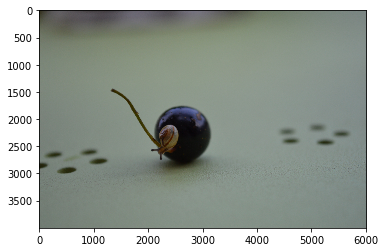

In [290]:
img_snail = cv2.imread("snail.JPG")
img_snail = cv2.cvtColor(img_snail, cv2.COLOR_BGR2RGB)
plt.imshow(snail_img) #gives the picture out

Now we can see the image. In this project we want to focus on the **Rule of Third (RT)**. 

The first step to work with the Rule of Third is to find out how big the scanned images are in the x-axis (width of image) and in the y-axis (height of image). That happens with the **shape** function. The shape of an image is accessed by img.shape. It returns a tuple of the number of rows, columns, and channels (if the image is color). Height is at index 0, width is at index 1; and number of channels at index 2. To calculate the first line for the RT it divides the height (resp. the width) of the photo by 3. Therefore the "//" operator is used since we need integer values for the further processing. For the second horizontal line the height is divided by 3 too but now the result is multiplied by 2. Similarly for the vertical line.

In [0]:
def generate_image_data(img):
  height = img.shape[0]
  width = img.shape[1]

  #calulating the lines for the rule of thirds
  third_of_height_1 = height // 3
  third_of_height_2 = (height // 3) * 2
  third_of_width_1 = width // 3
  third_of_width_2 = (width // 3) * 2
  return width, height, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2


### Calculation of the lines of interest

The following function called **draw_rule_of_thirds** is used to draw the lines of the *Rule of Thirds* (RT) on the given photo. The function requires an object of type *img*, the colour the lines should appear and the line width for the RT-lines. It returns an object of type *img*.

After the preprocessing in the **generate_image_data** function we have all information to draw the RT-lines. Therefore we use the **axhline**-function of *matplotlib* for the horizontal lines and similarly the **axvline**-function for the vertical lines. Since we have images with different colours we have to draw the RT-lines in black or white depending on the average colour of the picture. To determine the average colour we add up all pixels of the gray version of the image and divide the sum by total amount of pixels of the image matrix.

At the end the function returns the photo with the RT-lines on it. The RT-lines are shown in a different layer as the image is shown because we do not want to have the line in the image later on.


In [0]:
def draw_rule_of_thirds(img):
  img = img.copy()
  #calulating the height and width of the image and the lines for the rule of thirds
  width, height, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(img)

  #calculating the average_brightness of the image
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  average_brightness = img_gray.sum() // (len(img_gray)*len(img_gray[0]))
 
  black = (0,0,0)
  white = (255,255,255)
  thickness = max(width, height) // 200 
  #define the line color in dependence of the brightness
  if average_brightness >= 129:
    #drawing the lines on the photo calculated above
    #drawing the horizontal lines
    cv2.line(img, (0, third_of_height_1), (width, third_of_height_1), black, thickness=thickness, lineType=cv2.LINE_AA)
    cv2.line(img, (0, third_of_height_2), (width, third_of_height_2), black, thickness=thickness, lineType=cv2.LINE_AA)
    #plt.axhline(y = third_of_height_1, color = 'k')
    #plt.axhline(y = third_of_height_2, color = 'k')
    #drawing the vertical lines  
    cv2.line(img, (third_of_width_1, 0), (third_of_width_1, height), black, thickness=thickness, lineType=cv2.LINE_AA)
    cv2.line(img, (third_of_width_2, 0), (third_of_width_2, height), black, thickness=thickness, lineType=cv2.LINE_AA)
   # plt.axvline(x = third_of_width_1, color = 'k')
   # plt.axvline(x = third_of_width_2, color = 'k')
  else:
    #drawing the lines on the photo calculated above
    #drawing the horizontal lines
    cv2.line(img, (0, third_of_height_1), (width, third_of_height_1), white, thickness=thickness, lineType=cv2.LINE_AA)
    cv2.line(img, (0, third_of_height_2), (width, third_of_height_2), white, thickness=thickness, lineType=cv2.LINE_AA)
    # plt.axhline(y = third_of_height_1, color = 'w')
    # plt.axhline(y = third_of_height_2, color = 'w')
    #drawing the vertical lines
    cv2.line(img, (third_of_width_1, 0), (third_of_width_1, height), white, thickness=thickness, lineType=cv2.LINE_AA)
    cv2.line(img, (third_of_width_2, 0), (third_of_width_2, height), white, thickness=thickness, lineType=cv2.LINE_AA)
    # plt.axvline(x = third_of_width_1, color = 'w')
    # plt.axvline(x = third_of_width_2, color = 'w')
  return img

If we now apply the function to one of the images, the result looks like this: 

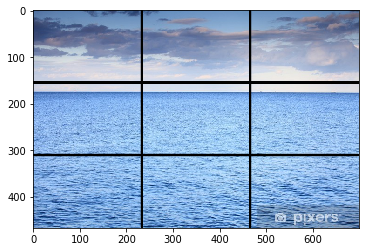

In [286]:
img = cv2.imread("goodhorizon.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rt_original = draw_rule_of_thirds(img)
plt.imshow(rt_original)
plt.imshow(rt_original)

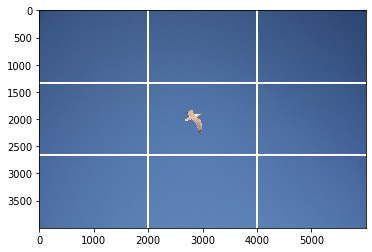

In [262]:
img_seagull = cv2.imread("moewe.JPG")
img_seagull = cv2.cvtColor(img_seagull, cv2.COLOR_BGR2RGB)
img_seagull = draw_rule_of_thirds(img_seagull)
plt.imshow(img_seagull)

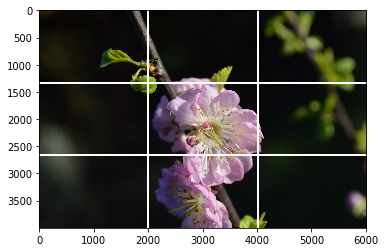

In [263]:
img = cv2.imread("flower.JPEG")
img_flower = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_flower = draw_rule_of_thirds(img_flower)
plt.imshow(img_flower)

### Calculation of the points of interests

Now that we have calculated and drawn the lines of interest of the Rule of Third, we can now calculate the intersections of these lines, also known as **points of interest**. 

First of all we use the generateImageData function again. Then the tuples of the points of interest are formed. Since the lines each consist of only one value, the horizontal lines intersect with the respective vertical lines.

In [0]:
def poi(img):
  width, height, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 =generate_image_data(img)

  poi1 = tuple([third_of_height_1, third_of_width_1])
  poi2 = tuple([third_of_height_1, third_of_width_2])
  poi3 = tuple([third_of_height_2, third_of_width_1])
  poi4 = tuple([third_of_height_2, third_of_width_2])

  print(poi1)
  print(poi2)
  print(poi3)
  print(poi4)

In [0]:
poi(img_snail)

(1333, 2005)
(1333, 4010)
(2666, 2005)
(2666, 4010)


### Detection of horizons

The lines of the Rule of Third serve as orientation to align certain features in the photo with it. So for example also the horizon. We want to achieve to recognize the horizon and then align it with the lines of interest.

In the function **process_img** the image is loaded again with the function generateImageData with all values calculated in the function. In **vertices**, the area to be ignored when the horizon is detected is specified. This area is located above the upper line of interest and below the lower line of interest.

Then the **processed_img** is generated. It is generated with the function **roi** which stands for **Region of Interest**. This function gets the image and the vertices as parameters.

First, an empty mask is created with **np.zeros_like**. The mask is filled with **cv2.fillPoly**. This function gets the empty mask passed as an image, the vertices and the color with which the polygonal area resulting from the vertices should be filled. In this case it is white. The photo and the filled mask are now connected with **cv2.bitwise_and**. So in the end only what is not white will be displayed.

In [0]:
def roi(img, vertices):
    #blank mask:
    mask = np.zeros_like(img)
    # fill the mask
    cv2.fillPoly(mask, vertices, 255)
    # now only show the area that is the mask
    masked = cv2.bitwise_and(img, mask)
    return masked

In [0]:
def process_img(img):
    height, width, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(img)

    vertices = np.array([[0,third_of_height_1],[width,third_of_height_1], [width,third_of_height_2],[0,third_of_height_2]], np.int32)
    processed_img = roi(img, [vertices])
    
    return processed_img

In order to be able to recognize the horizon in an image, a copy (**np.copy**) of the image is first created because the original should not be changed. 

A pre-processing of the image must take place so that the horizon can be recognized. At first the image is converted into **grayscale** because less information needs to be provided for each pixel. Then the grayscaled image is filtered with **GaussianBlur** for reducing image noise and details. On the blurred picture we apply the **Canny Algorithm** for extracting useful structural information from different vision objects and dramatically reducing the amount of data to be processed. After that the mask of the function **process_img** is applied.

The next step is to extract a better line of the horizon. This is done with **dilation** and **erosion**. Dilation and Erosion is a morphological basic operation in digital image processing. 

The **Hough-Transformation** is a robust global method for the recognition of straight lines, circles or any other parameterizable geometric figures in a binary gradient image, i.e. a black-and-white image, after an edge detection. This is used for detecting the horizon. The arguments rho, theta, threshold, min_line_length, max_line_gap and line_image are necessary. We use **HoughLinesP** with probabilities because we can add a **max_line_gap** so that gaps are ignored and we will have a better line. If lines are detected they will be drawn.

In [0]:
def detect_horizon(img):
  result = np.copy(img)
  #preprocessing of the image to detect lines
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (9,9),2)
  edges = cv2.Canny(blur,50,150,apertureSize = 3)
  processed_img = process_img(edges)
 
  #dilate and erose the binary image to extract better lines
  kernel = np.ones((2,10),np.uint8)
  dilation = cv2.dilate(processed_img,kernel,iterations = 3)
  erosion = cv2.erode(dilation,kernel,iterations = 2)

  #get the width of the image to calculate the minimal length of the line in the
  #image in dependence of the width of the image
  height, width, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(dilation)
  
  #define the arguments for the function of the Hough Line Transformation
  rho = 1  # distance resolution in pixels of the Hough grid
  theta = np.pi / 180  # angular resolution in radians of the Hough grid
  threshold = 15  # minimum number of votes (intersections in Hough grid cell)
  min_line_length = int(width*0.05)  # minimum number of pixels making up a line
  max_line_gap = 80  # maximum gap in pixels between connectable line segments
  line_image = np.copy(img) * 0  # creating a blank to draw lines on

  # Run Hough on edge detected image
  # Output "lines" is an array containing endpoints of detected line segments
  lines = cv2.HoughLinesP(dilation, rho, theta, threshold, np.array([]),
                   min_line_length, max_line_gap)
  if lines is not None:
    for line in lines:
      for x1,y1,x2,y2 in line:
        #print(x1,y1,x2,y2)
        #draw the detected lines into the image
        image_line = cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
        lines_edges = cv2.addWeighted(result, 0.8, line_image, 1, 0)
    return img, edges, dilation, erosion, image_line, lines_edges, lines
  else: #if no lines are detected
    print("Konnte leider keine Linien erkennen.") 

In [0]:
def get_Coordinates_of_horizon(lines):
  start_point = tuple(lines[0][0],lines[0][1])
  last_row, last_column = lines.shape
  print(last_row)
  end_point = tuple(lines[n][2],lines[n][3])

####Examples

On the following pictures the function **detect_horizon** is applied.

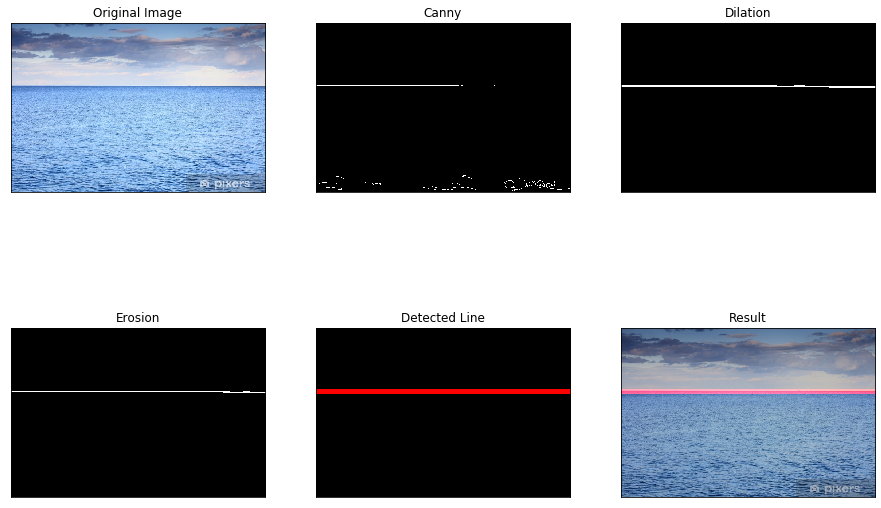

In [0]:
img = cv2.imread('goodhorizon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) # empty array for disabling ticks
plt.show()
#get_Coordinates_of_horizon(lines)

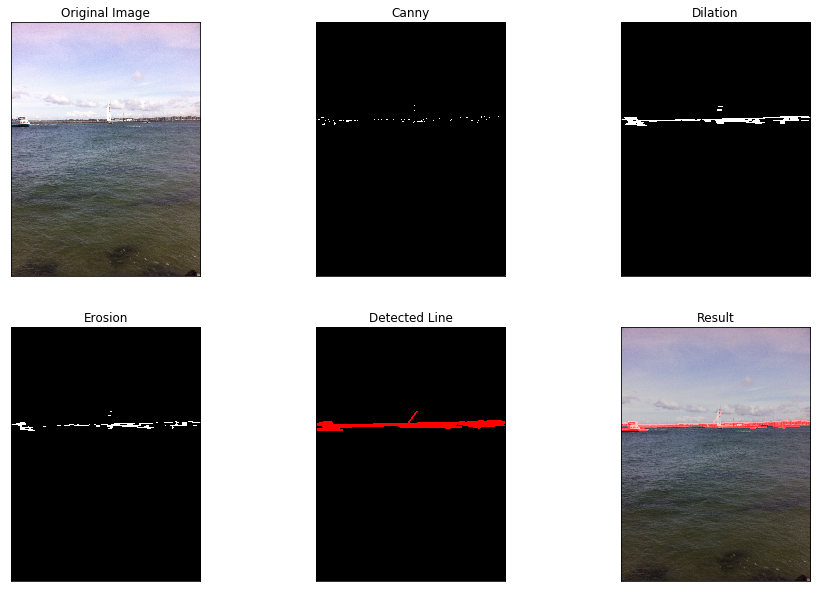

In [0]:
img = cv2.imread('ex5.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

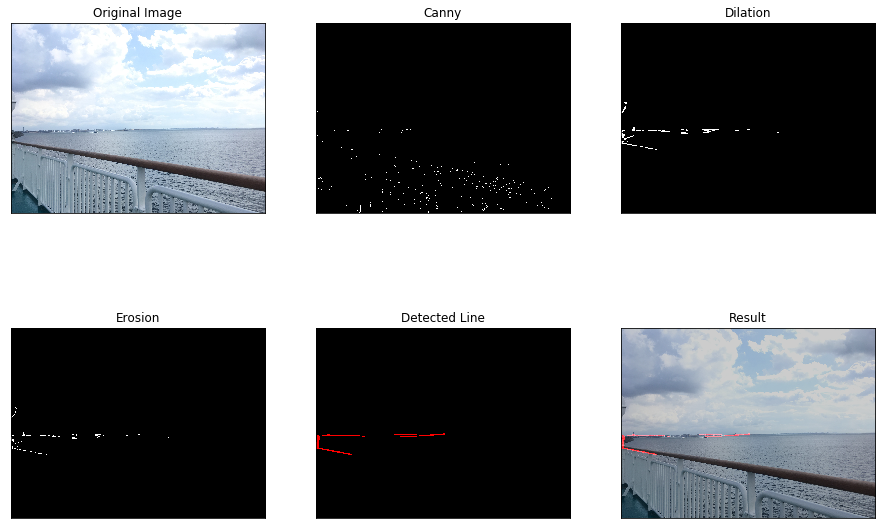

In [0]:
img = cv2.imread('ex6.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

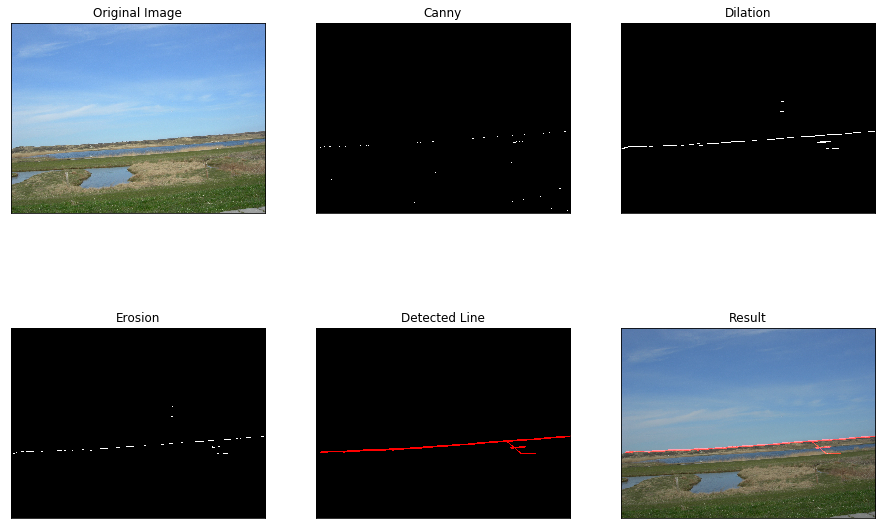

In [0]:
img = cv2.imread('DSCN0053.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

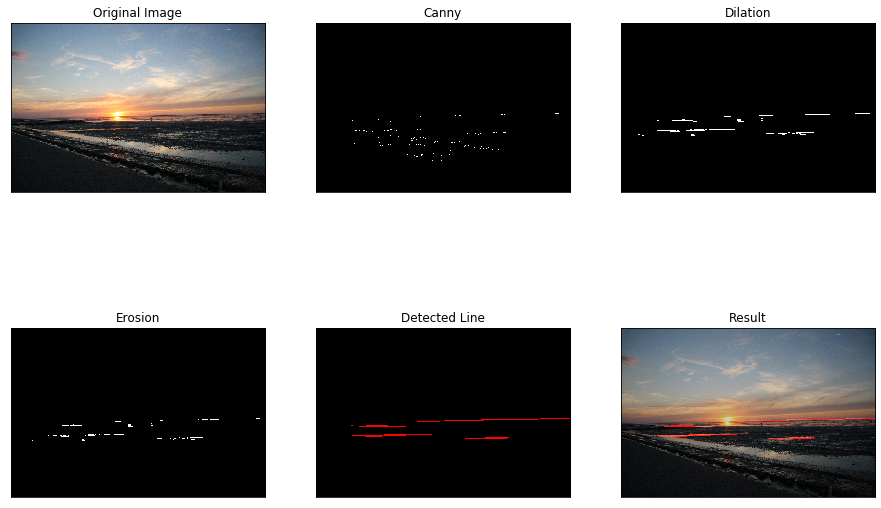

In [0]:
img = cv2.imread('IMG_1374.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

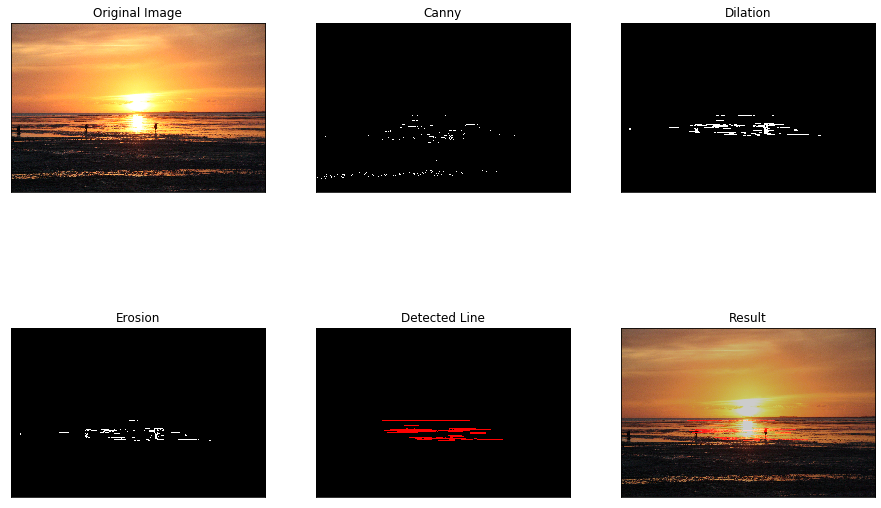

In [0]:
img = cv2.imread('IMG_1370.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

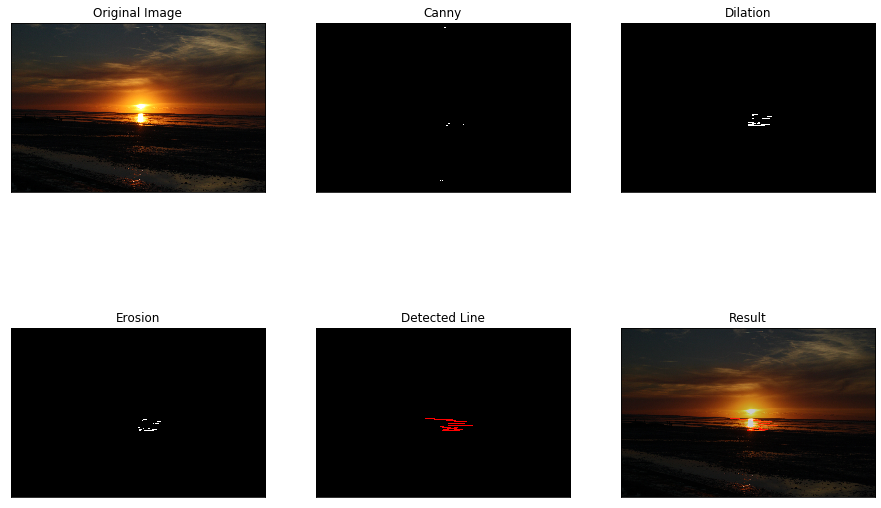

In [0]:
img = cv2.imread('IMG_1363.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

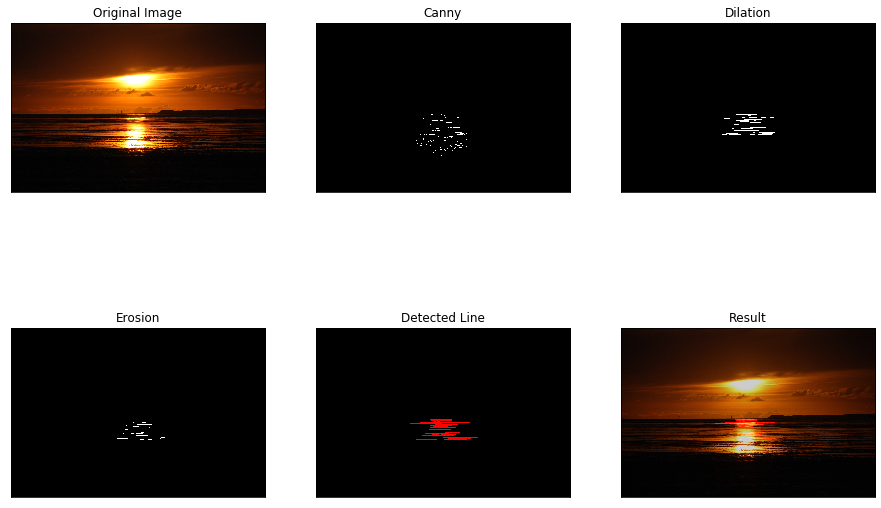

In [0]:
img = cv2.imread('IMG_1359.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

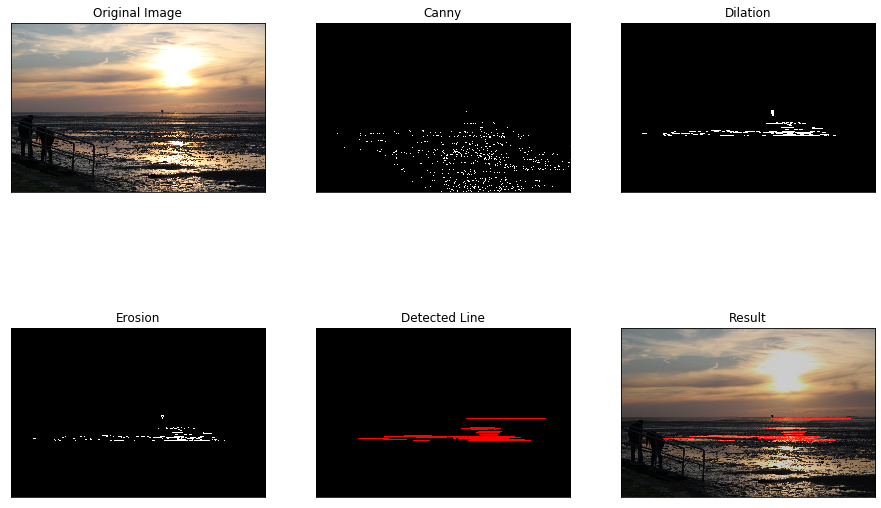

In [65]:
img = cv2.imread('IMG_1334.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Cropped Images

After the horizon has been recognized, the next step is to align the horizon with the line of interest. To do this, the image must be cropped. This is done with the function **crop_img**.

In this function the first index of the first array is the first point of detected horizon. Then the distance between the horizon and the second line of interest is calculated. After this step, the first and second cropping point is calculated . To crop the image proportionally, the left and right cropping point of the x axis is calculated at the end.

In [0]:
def crop_img(img):
  height, width, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(img)
  img_line, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
  horizon_y1 = lines[0][0][1]
  distance_horizon = third_of_height_2 - horizon_y1
  x = 0
  y = 0
  cropping_point_y = horizon_y1 + (horizon_y1//2)
  cropping_point_x = int((cropping_point_y/height)*width)
# determine the left and right cropping_point of the x-asis, to crop the picture middle-weight
  edge = int((width - cropping_point_x)//2)
  cropping_point_x_1 = edge
  cropping_point_x_2 = int(cropping_point_x + edge)
  cropped_img = img[y:cropping_point_y, cropping_point_x_1:cropping_point_x_2]
  return cropped_img  

In [0]:
def plot(images, titles, cols = len(images), show_ticks = False):
  rows = len(images) // cols

  for i in range(len(images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])

    if not show_ticks:
      plt.xticks([])
      plt.yticks([])

  plt.subplots_adjust(left=0, bottom=0, right=2, top=3)
  plt.show()
  return


In [0]:
def plot_cropped_using_rt(original_img):
  uncropped = original_img
  uncropped_rt = draw_rule_of_thirds(uncropped)
  cropped_img = crop_img(original_img)
  cropped_rt = draw_rule_of_thirds(cropped_img)

  titles = ['Original', 'Original with RT', 'Cropped', 'Cropped with RT']
  images = [img, uncropped_rt, cropped_img, cropped_rt] 
  plot(images, titles)
  return;

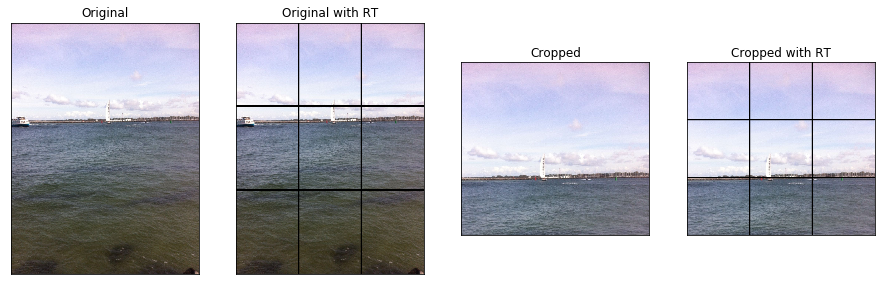

In [279]:
img = cv2.imread('ex5.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_cropped_using_rt(img)


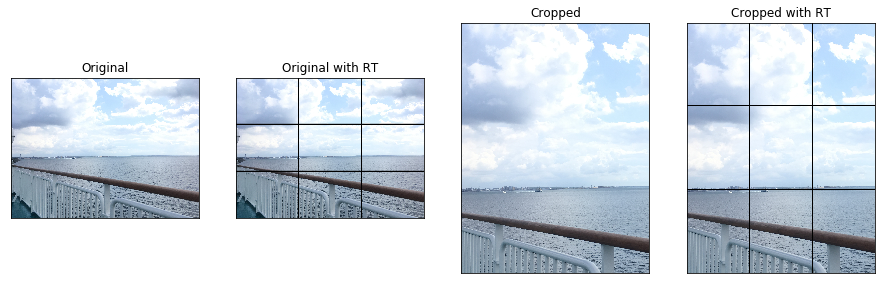

In [280]:
img = cv2.imread('ex6.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_cropped_using_rt(img)

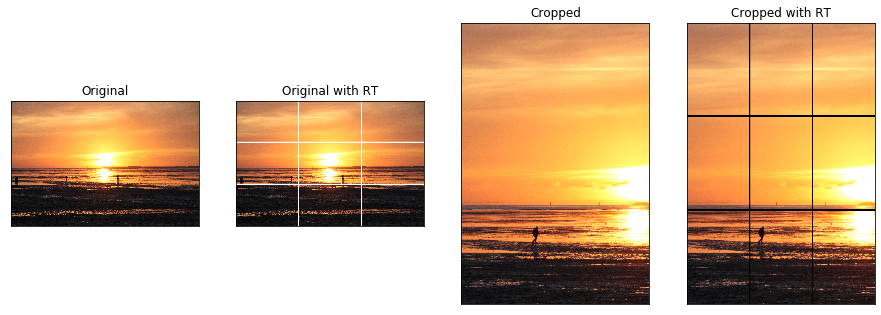

In [281]:
img = cv2.imread('IMG_1370.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_cropped_using_rt(img)

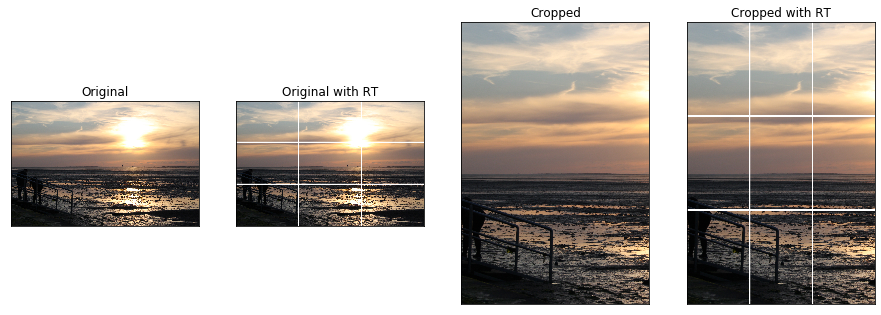

In [282]:
img = cv2.imread('IMG_1334.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_cropped_using_rt(img)

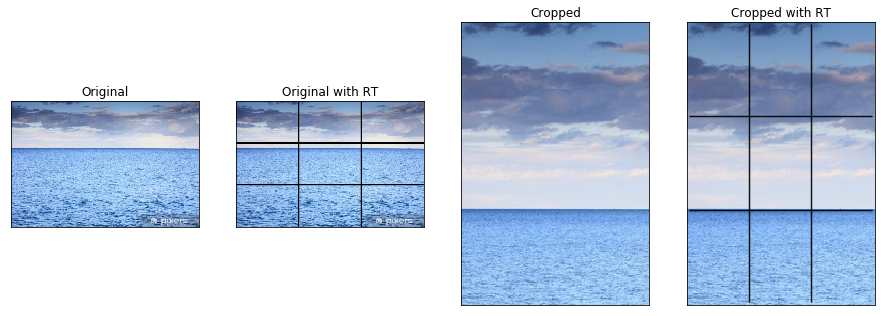

In [283]:
img = cv2.imread('goodhorizon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_cropped_using_rt(img)

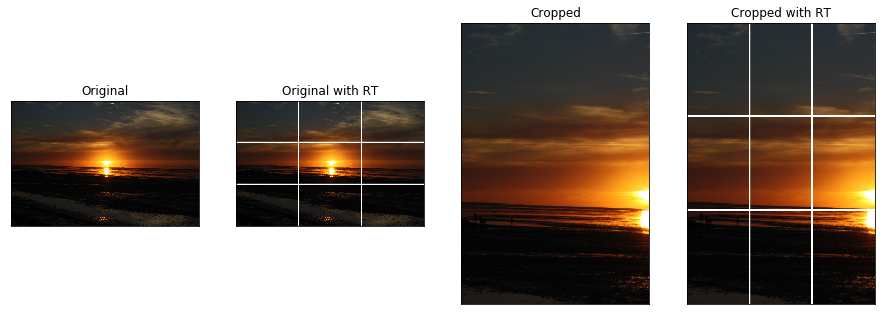

In [284]:
img = cv2.imread('IMG_1363.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_cropped_using_rt(img)

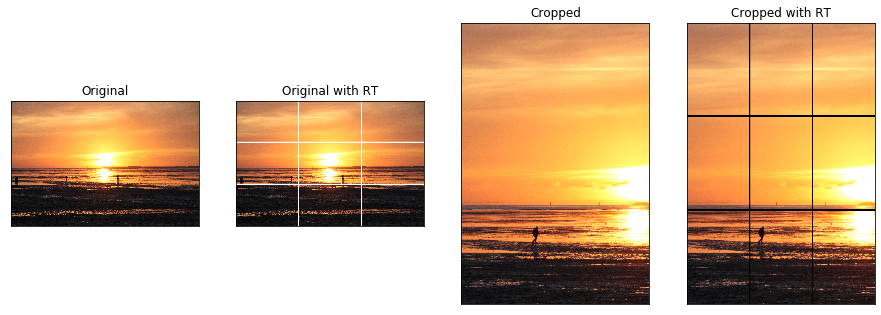

In [285]:
img = cv2.imread('IMG_1370.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_cropped_using_rt(img)

### Test Accumulator

In [0]:
from math import hypot

def hough(img):

    img = im.load()
    w, h = im.size
    print('w', w)
    print('h', h)

    thetaAxisSize = w #Width of the hough space image
    rAxisSize = h #Height of the hough space image
    rAxisSize= int(rAxisSize/2)*2 #we make sure that this number is even

    houghed_img = Image.new("L", (thetaAxisSize, rAxisSize), 255) #legt Bildgroesse fest
    pixel_houghed_img = houghed_img.load()

    max_radius = hypot(w, h)
    d_theta = np.pi / thetaAxisSize
    d_rho = max_radius / (rAxisSize/2) 

    #Accumulator
    for x in range(0, w):
        for y in range(0, h):

            treshold = 0
            col = img[x, y]
            if col <= treshold: #determines for each pixel at (x,y) if there is enough evidence of a straight line at that pixel.

                for vx in range(0, thetaAxisSize):
                    theta = d_theta * vx #angle between the x axis and the line connecting the origin with that closest point.
                    rho = x*np.cos(theta) + y*np.sin(theta) #distance from the origin to the closest point on the straight line
                    vy = rAxisSize/2 + int(rho/d_rho+0.5) #Berechne Y-Werte im hough space image
                    pixel_houghed_img[vx, vy] += 1 #voting

                    #threshold = 15  # minimum number of votes (intersections in Hough grid cell)
                    #min_line_length = int(width*0.05)  # minimum number of pixels making up a line
                    #max_line_gap = 80  # maximum gap in pixels between connectable line segments
                    #line_image = np.copy(img) * 0  # creating a blank to draw lines on

                    # Run Hough on edge detected image
                    # Output "lines" is an array containing endpoints of detected line segments
                    #lines = cv2.HoughLinesP(dilation, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)

    return houghed_img, rAxisSize, d_rho, d_theta 

def find_maxima(houghed_img, rAxisSize, d_rho, d_theta):

    w, h = houghed_img.size
    pixel_houghed_img = houghed_img.load()
    maxNumbers = 9
    ignoreRadius = 10
    maxima = [0] * maxNumbers
    rhos = [0] * maxNumbers
    thetas = [0] * maxNumbers

    for u in range(0, maxNumbers):

        print('u:', u)
        value = 0 
        xposition = 0
        yposition = 0

        #find maxima in the image
        for x in range(0, w):
            for y in range(0, h):

                if(pixel_houghed_img[x,y] > value):

                    value = pixel_houghed_img[x, y]
                    xposition = x
                    yposition = y

        #Save Maxima, rhos and thetas
        maxima[u] = value
        rhos[u] = (yposition - rAxisSize/2) * d_rho
        thetas[u] = xposition * d_theta

        pixel_houghed_img[xposition, yposition] = 0

        #Delete the values around the found maxima
        radius = ignoreRadius

        for vx2 in range (-radius, radius): #checks the values around the center
            for vy2 in range (-radius, radius): #checks the values around the center
                x2 = xposition + vx2 #sets the spectated position on the shifted value 
                y2 = yposition + vy2

                if not(x2 < 0 or x2 >= w):
                    if not(y2 < 0 or y2 >= h):

                        pixel_houghed_img[x2, y2] = 0
                        print(pixel_houghed_img[x2, y2])

    print('max', maxima)
    print('rho', rhos)
    print('theta', thetas)

    return maxima, rhos, thetas

! wget -q https://i.stack.imgur.com/mZc0q.png
img = cv2.imread('mZc0q.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#laplacian = cv2.Laplacian(img,cv2.CV_64F)
blur = cv2.GaussianBlur(gray, (9,9),2)
edges = cv2.Canny(blur,50,150,apertureSize = 3)

kernel = np.ones((2,10),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 3)
dilation_inv = cv2.bitwise_not(dilation)

im = Image.open('mZc0q.png').convert("L")
houghed_img, rAxisSize, d_rho, d_theta = hough(gray)
#houghed_img.save("houghspace.bmp")

img_copy = np.ones(img.shape)

maxima, rhos, thetas = find_maxima(houghed_img, rAxisSize, d_rho, d_theta)

for t in range(0, len(maxima)):
    a = np.cos(thetas[t])
    b = np.sin(thetas[t])
    x = a * rhos[t]
    y = b * rhos[t]
    pt1 = (int(x + 1000*(-b)), int(y + 1000*(a)))
    pt2 = (int(x - 1000*(-b)), int(y - 1000*(a)))
    img_lines = cv2.line(img_copy, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

titles = ['Original Image', 'Canny',
            'Hough', 'empty', 'Detected Line', 'Inverse Dilation']
images = [img, edges, houghed_img, img_copy, img_lines, dilation_inv]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
#plt.imshow(img_lines)

### Detect Circles

[[[401.5 236.5 150.1]]]


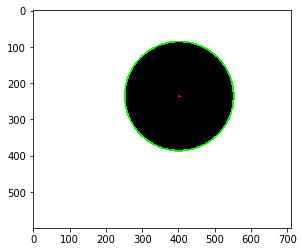

In [0]:
img = cv2.imread('circle.png')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
median = cv2.medianBlur(gray, 5)
plt.imshow(median, 'gray')

circles = cv2.HoughCircles(median, cv2.HOUGH_GRADIENT, 1, 30, param1=50, param2=30, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))
print(circles)
for (x, y, r) in detected_circles[0,:]:
  img_circle = cv2.circle(output, (x, y), r, (0, 255, 0), 3)
  cv2.circle(output, (x, y), 2, (255, 0, 0), 3) 

plt.imshow(img_circle)



[[[2836 2118  150]
  [2936 1954   42]]]


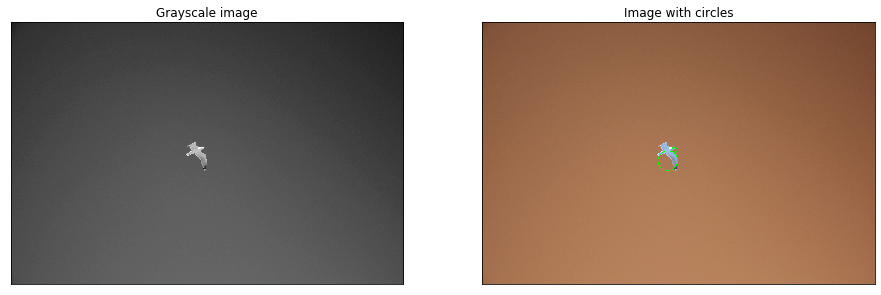

In [0]:
img = cv2.imread('moewe.JPG')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(median, cv2.HOUGH_GRADIENT, 0.9, 120, param1=50, 
                           param2=30, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))
print(detected_circles)
for i in circles[0,:]:
  #draw the outer circle
  img_circle = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 10)
  #draw center of circle
  img_center = cv2.circle( img, (i[0], i[1]), 2, (0, 0, 255), 5)

titles = ['Grayscale image', 'Image with circles']
rt_circle = draw_rule_of_thirds(img_circle)
images = [gray, img_circle, rt_circle]

plt.imshow(img_circle)
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i], 'gray')
    plt.subplots_adjust(left=1.0, bottom=1.0, right=3.0, top=3.0)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Saliency Detection
Here we will do the static saliency detection because we only have images - no videos, no frames.

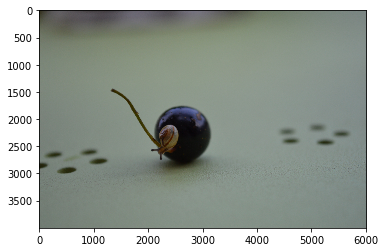

In [0]:
#import the necessary packages
import argparse
import cv2
from google.colab.patches import cv2_imshow

#load the image
img_snail = cv2.imread("snail.JPG") #gives the picture a variable
img_snail = cv2.cvtColor(img_snail, cv2.COLOR_BGR2RGB)
plt.imshow(img_snail)

In [0]:
def spectralResidualSaliency(img):
  #initialize OpenCV's static saliency spectral residual detector and compute 
  #the saliency map
  saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
  (success, saliencyMap) = saliency.computeSaliency(img)

  saliencyMap = (saliencyMap * 255)
  threshMap = cv2.threshold(saliencyMap.astype("uint8"), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  return img, saliencyMap, threshMap

In [0]:
def fineGrainedSaliency(img):
  saliencyFG = cv2.saliency.StaticSaliencyFineGrained_create()
  (success, saliencyMap) = saliencyFG.computeSaliency(img)
  #if we would like a *binary* map that we could process for contours,
  #c0ompute convex hull's, extract bounding boxes, etc., we can additionally
  # threshold the saliency map
  threshMap = cv2.threshold(saliencyMap.astype("uint8"), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  return img, saliencyMap, threshMap


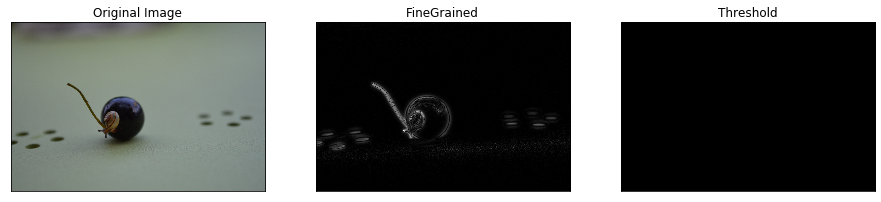

In [0]:
img, saliencyMap, threshMap = fineGrainedSaliency(img_snail)
#show images
titles = ['Original Image', 'FineGrained',
          'Threshold']
images = [img, saliencyMap, threshMap]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

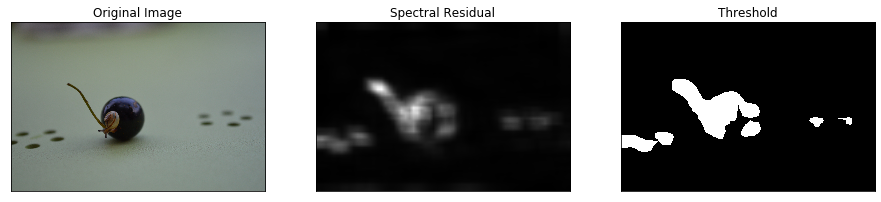

In [0]:
img, saliencyMap, threshMap = spectralResidualSaliency(img_snail)
#show images
titles = ['Original Image', 'Spectral Residual',
          'Threshold']
images = [img, saliencyMap, threshMap]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
img, saliencyMap, threshMap = spectralResidualSaliency(img_snail)
contours, hierarchy = cv2.findContours(threshMap.astype("uint8"),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)

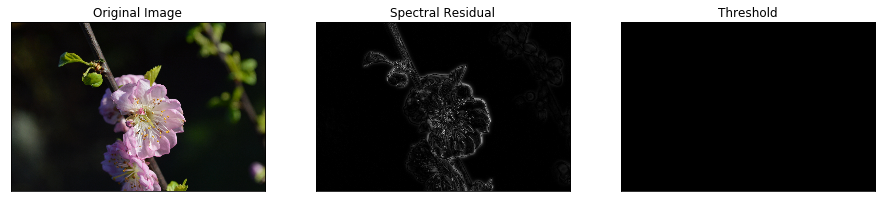

In [0]:
img = cv2.imread("flower.JPEG")
img_flower = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, saliencyMap, threshMap = fineGrainedSaliency(img_flower)

#show images
titles = ['Original Image', 'Spectral Residual',
          'Threshold']
images = [img, saliencyMap, threshMap]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

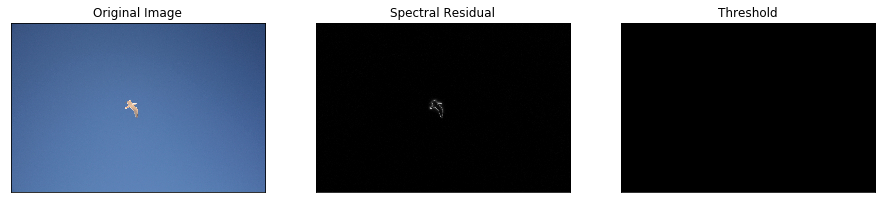

In [0]:
img_seagull = cv2.imread("moewe.JPG")
img_seagull = cv2.cvtColor(img_seagull, cv2.COLOR_BGR2RGB)
img, saliencyMap, threshMap = fineGrainedSaliency(img_seagull)

#show images
titles = ['Original Image', 'Spectral Residual',
          'Threshold']
images = [img, saliencyMap, threshMap]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

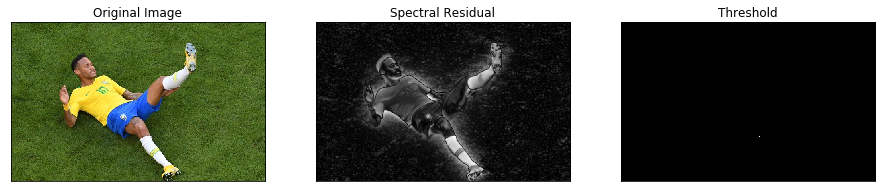

In [0]:
img_soccer = cv2.imread("grafik.png")
img_soccer = cv2.cvtColor(img_soccer, cv2.COLOR_BGR2RGB)
img, saliencyMap, threshMap = fineGrainedSaliency(img_soccer)
#show images
titles = ['Original Image', 'Spectral Residual',
          'Threshold']
images = [img, saliencyMap, threshMap]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

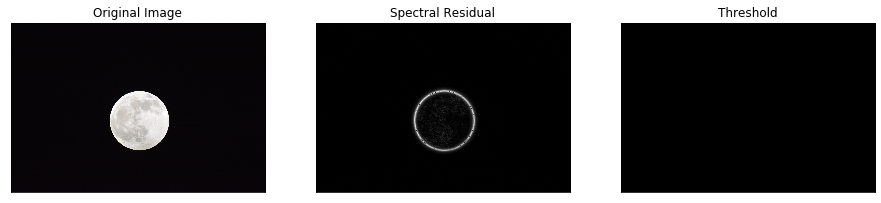

In [0]:
img_moon = cv2.imread("moon.JPG")
img_moon = cv2.cvtColor(img_moon, cv2.COLOR_BGR2RGB)
img, saliencyMap, threshMap = fineGrainedSaliency(img_moon)
#show images
titles = ['Original Image', 'Spectral Residual',
          'Threshold']
images = [img, saliencyMap, threshMap]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

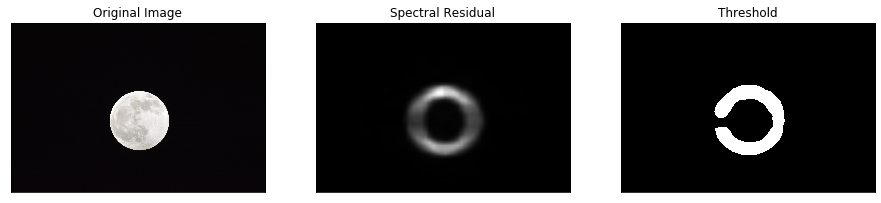

In [0]:
img, saliencyMap, threshMap = spectralResidualSaliency(img_moon)
#show images
titles = ['Original Image', 'Spectral Residual',
          'Threshold']
images = [img, saliencyMap, threshMap]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
contours, hierarchy= cv2.findContours(threshMap,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#all contours
img = cv2.drawContours(img_moon, contours, -1, (0,255,0), 3)
#individual contour
img = cv2.drawContours(img_moon, contours, 0, (0,255,0), 3)
#OR
cnt = contours[4]
img = cv2.drawContours(img_moon, [cnt], 0, (0,255,0), 3)

IndexError: ignored